Title

In [11]:
library(tidyverse)
library(dplyr)
library(workflows)
library(recipes)
library(parsnip)

Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”

Attaching package: ‘recipes’


The following object is masked from ‘package:stringr’:

    fixed


The following object is masked from ‘package:stats’:

    step


Warning message:
“package ‘parsnip’ was built under R version 4.0.2”


In [2]:
stroke_data <- read_csv("data/healthcare-dataset-stroke-data.csv")
stroke_data

Parsed with column specification:
cols(
  id = col_double(),
  gender = col_character(),
  age = col_double(),
  hypertension = col_double(),
  heart_disease = col_double(),
  ever_married = col_character(),
  work_type = col_character(),
  Residence_type = col_character(),
  avg_glucose_level = col_double(),
  bmi = col_character(),
  smoking_status = col_character(),
  stroke = col_double()
)



id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1
27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1


1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

Dataset source: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
Author credentials: fedesoriano

In [3]:
glimpse(stroke_data)

Rows: 5,110
Columns: 12
$ id                <dbl> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 1043…
$ gender            <chr> "Male", "Female", "Male", "Female", "Female", "Male…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54,…
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, …
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, …
$ ever_married      <chr> "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "Yes", "N…
$ work_type         <chr> "Private", "Self-employed", "Private", "Private", "…
$ Residence_type    <chr> "Urban", "Rural", "Rural", "Urban", "Rural", "Urban…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.…
$ bmi               <chr> "36.6", "N/A", "32.5", "34.4", "24", "29", "27.4", …
$ smoking_status    <chr> "formerly smoked", "never smoked", "never smoked", …
$ stroke            <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …


In [22]:
# If working on gender, ever_married, work_type, Residence_type, smoking_status, and stroke as categorical statistical variables
# need to convert them to a factor
stroke_data <- stroke_data %>%
    mutate(gender = as_factor(gender)) %>%
    mutate(ever_married = as_factor(ever_married)) %>%
    mutate(work_type = as_factor(work_type)) %>%
    mutate(Residence_type = as_factor(Residence_type)) %>%
    mutate(smoking_status = as_factor(smoking_status)) %>%
    mutate(bmi = as.double(bmi)) %>%
    mutate(stroke = as_factor(stroke))
glimpse(stroke_data)

Rows: 5,110
Columns: 13
$ id                <dbl> 9046, 51676, 31112, 60182, 1665, 56669, 53882, 1043…
$ gender            <fct> Male, Female, Male, Female, Female, Male, Male, Fem…
$ age               <dbl> 67, 61, 80, 49, 79, 81, 74, 69, 59, 78, 81, 61, 54,…
$ hypertension      <dbl> 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, …
$ heart_disease     <dbl> 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, …
$ ever_married      <fct> Yes, Yes, Yes, Yes, Yes, Yes, Yes, No, Yes, Yes, Ye…
$ work_type         <fct> Private, Self-employed, Private, Private, Self-empl…
$ Residence_type    <fct> Urban, Rural, Rural, Urban, Rural, Urban, Rural, Ur…
$ avg_glucose_level <dbl> 228.69, 202.21, 105.92, 171.23, 174.12, 186.21, 70.…
$ bmi               <dbl> 36.6, NA, 32.5, 34.4, 24.0, 29.0, 27.4, 22.8, NA, 2…
$ smoking_status    <fct> formerly smoked, never smoked, never smoked, smokes…
$ stroke            <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ na.rm             <lgl> TR

In [5]:
# Verify the levels of the stroke category
stroke_data %>%
    pull(stroke) %>%
    levels()

[1] "0" "1"

According to attribute values previously mentioned in point 12) stroke: 1 if the patient had a stroke or 0 if not

In [6]:
# Exploratory Data
# Finding the number and percentage of observations of patients that had a stroke and patients that have not
stroke_obs <- nrow(stroke_data)
stroke_data %>%
    group_by(stroke) %>%
    summarize(count = n(), percentage = n() / stroke_obs * 100)

`summarise()` ungrouping output (override with `.groups` argument)



stroke,count,percentage
<fct>,<int>,<dbl>
0,4861,95.127202
1,249,4.872798


In [25]:
# Data means
stroke_data_means <- stroke_data %>%
    group_by(stroke) %>%
    summarize(
    min_bmi = min(bmi),
    max_bmi = max(bmi),
    min_glucose_level = min(avg_glucose_level),
    max_gluclose_level = max(avg_glucose_level))
stroke_data_means

`summarise()` ungrouping output (override with `.groups` argument)



stroke,min_bmi,max_bmi,min_glucose_level,max_gluclose_level
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
0,NA,NA,55.12,267.76
1,NA,NA,56.11,271.74


Warning message:
“Removed 201 rows containing missing values (geom_point).”


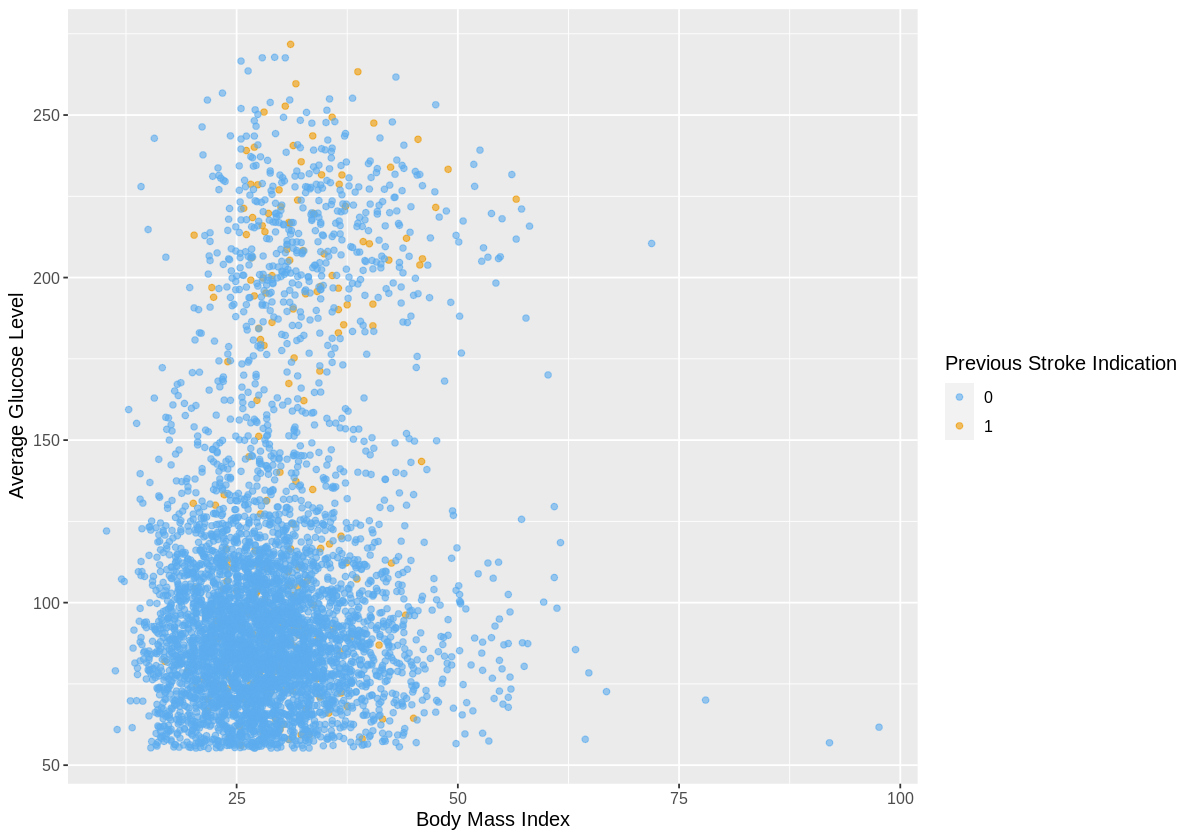

In [7]:
options(repr.plot.width = 8, repr.plot.width= 10)
# Scatter plot visualization of the relationship between the ***VARIABLES OF INTEREST***
# bmi and avg_glucose_level
bmi_avg_gluc <- stroke_data %>%
    ggplot(aes(x = bmi, y = avg_glucose_level, color = stroke)) +
    geom_point(alpha = 0.6) +
    labs(x = "Body Mass Index", y = "Average Glucose Level", color = "Previous Stroke Indication") +
    scale_color_manual(labels = c(0, 1),
                       values = c("steelblue2", "orange2")) +
    theme(text = element_text(size = 12))
bmi_avg_gluc


In [17]:
#Test
# unscaled data
unscaled_stroke_data <- stroke_data %>%
    select(stroke, bmi, avg_glucose_level)
unscaled_stroke_data


stroke,bmi,avg_glucose_level
<fct>,<dbl>,<dbl>
1,36.6,228.69
1,NA,202.21
1,32.5,105.92
1,34.4,171.23
1,24.0,174.12
1,29.0,186.21
1,27.4,70.09
1,22.8,94.39
1,NA,76.15


In [18]:
sd_recipe <- recipe(stroke ~ ., data = unscaled_stroke_data)
print(sd_recipe)

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2


In [19]:
sd_recipe <- sd_recipe %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) %>%
    prep()
sd_recipe


Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Training data contained 5110 data points and 201 incomplete rows. 

Operations:

Scaling for bmi, avg_glucose_level [trained]
Centering for bmi, avg_glucose_level [trained]

In [20]:
scaled_stroke_data <- bake(sd_recipe, unscaled_stroke_data)
scaled_stroke_data

bmi,avg_glucose_level,stroke
<dbl>,<dbl>,<fct>
0.98124492,2.706110617,1
NA,2.121350940,1
0.45922236,-0.005027809,1
0.70113526,1.437217451,1
-0.62301952,1.501037522,1
0.01359335,1.768021830,1
-0.19012277,-0.796264185,1
-0.77580661,-0.259645599,1
NA,-0.662440784,1


Warning message:
“Removed 201 rows containing missing values (geom_point).”


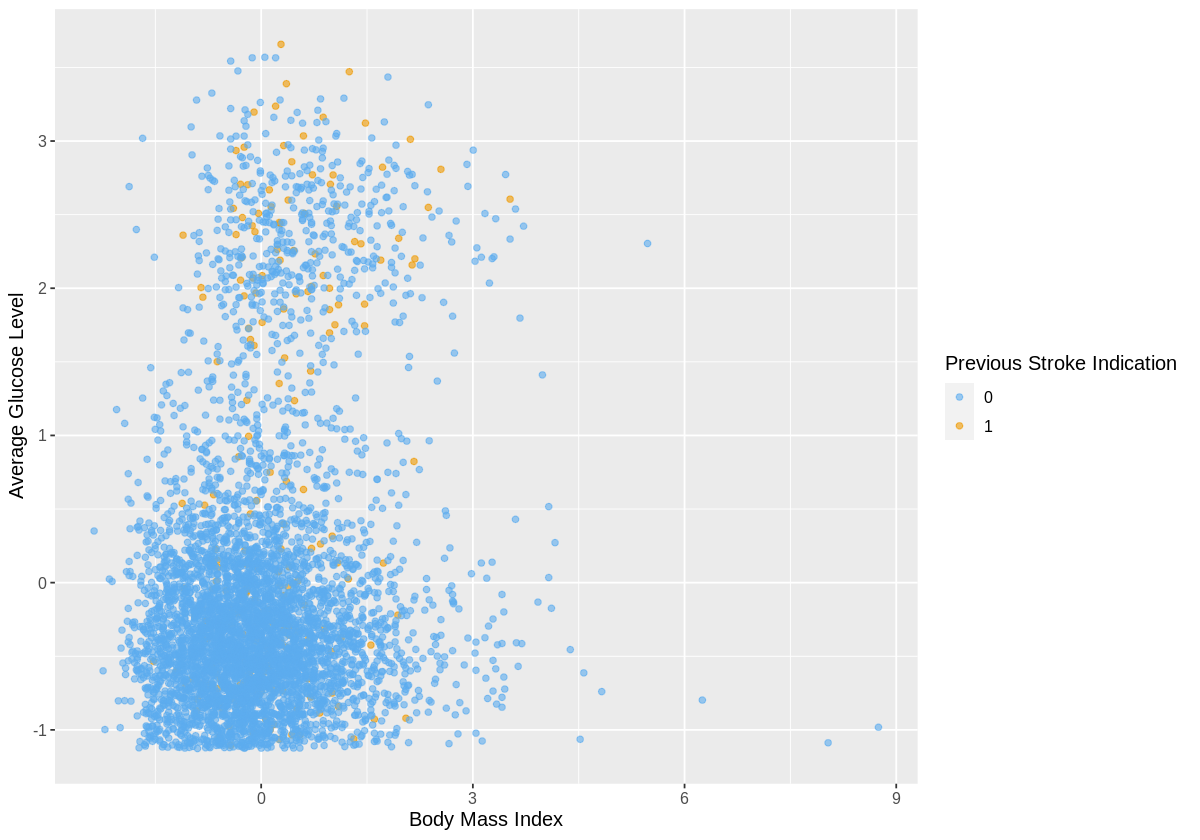

In [23]:
scaled_bmi_avg_gluc <- scaled_stroke_data %>%
    ggplot(aes(x = bmi, y = avg_glucose_level, color = stroke)) +
    geom_point(alpha = 0.6) +
    labs(x = "Body Mass Index", y = "Average Glucose Level", color = "Previous Stroke Indication") +
    scale_color_manual(labels = c(0, 1),
                       values = c("steelblue2", "orange2")) +
    theme(text = element_text(size = 12))
scaled_bmi_avg_gluc

Title

Introduction


    Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to   understand the rest of your proposal
    Clearly state the question you will try to answer with your project
    Identify and describe the dataset that will be used to answer the question


Preliminary exploratory data analysis:


    Demonstrate that the dataset can be read from the web into R 
    Clean and wrangle your data into a tidy format
    Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
    Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.



Methods



    Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
    Describe at least one way that you will visualize the results


Expected outcomes and significance:


    What do you expect to find?
    What impact could such findings have?
    What future questions could this lead to?
